In [53]:
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
import seaborn as sns
import numpy as np

env = EV_Sce_Env('SY_2', seed=0)

In [54]:
#哈佛大学Data Science课程CS109推荐的matplotlib 默认设置
#可以方便的设置一次，保证整体风格一致
from matplotlib import rcParams
# #图片大小
# rcParams['figure.figsize'] = (10, 6)
# #图片精度
# rcParams['figure.dpi'] = 150
# #线宽
# rcParams['lines.linewidth'] = 2
#是否显示网格
rcParams['axes.grid'] = True
#axes 填充颜色为浅灰
rcParams['axes.facecolor'] = '#eeeeee'
# #字体大小为14
# rcParams['font.size'] = 14
#边框为无色
rcParams['patch.edgecolor'] = 'none'

In [55]:
route_con = {}
route_list = {}
for i in range(env.agent_num):
    ev_id = i
    df_r = pd.read_csv('output/SY_2_T1_GH/EV/EV{}_route.csv'.format(ev_id))
    route = list(df_r['edge'])
    r = route[0]
    for j in range(1, len(route)):
        next_p = route[j].split('-')[-1]
        r += "-"+next_p
    if r not in route_con.keys():
        route_con[r] = 1
        route_list[r] = [ev_id]
    else:
        route_con[r] += 1
        route_list[r].append(ev_id)
GH_route = route_con

route_con = {}
route_list = {}
for i in range(env.agent_num):
    ev_id = i
    df_r = pd.read_csv('output/SY_2_T1_NGH/EV/EV{}_route.csv'.format(ev_id))
    route = list(df_r['edge'])
    r = route[0]
    for j in range(1, len(route)):
        next_p = route[j].split('-')[-1]
        r += "-"+next_p
    if r not in route_con.keys():
        route_con[r] = 1
        route_list[r] = [ev_id]
    else:
        route_con[r] += 1
        route_list[r].append(ev_id)
NGH_route = route_con
route_set1 = list(set(list(GH_route.keys()) + list(NGH_route.keys())))

In [56]:
route_con = {}
route_list = {}
for i in range(env.agent_num):
    ev_id = i
    df_r = pd.read_csv('output/SY_25_T1_GH/EV/EV{}_route.csv'.format(ev_id))
    route = list(df_r['edge'])
    r = route[0]
    for j in range(1, len(route)):
        next_p = route[j].split('-')[-1]
        r += "-"+next_p
    if r not in route_con.keys():
        route_con[r] = 1
        route_list[r] = [ev_id]
    else:
        route_con[r] += 1
        route_list[r].append(ev_id)
GH_route2 = route_con

route_con = {}
route_list = {}
for i in range(env.agent_num):
    ev_id = i
    df_r = pd.read_csv('output/SY_25_T1_NGH/EV/EV{}_route.csv'.format(ev_id))
    route = list(df_r['edge'])
    r = route[0]
    for j in range(1, len(route)):
        next_p = route[j].split('-')[-1]
        r += "-"+next_p
    if r not in route_con.keys():
        route_con[r] = 1
        route_list[r] = [ev_id]
    else:
        route_con[r] += 1
        route_list[r].append(ev_id)
NGH_route2 = route_con
route_set2 = list(set(list(GH_route2.keys()) + list(NGH_route2.keys())))

In [57]:
OD2edge = {} # O-D: 边编号
for e in range(env.edge_index.shape[1]):
    O = int(env.edge_index[0][e])
    D = int(env.edge_index[1][e])
    index = str(O) + '-' + str(D)
    OD2edge[index] = e

def route_length(r):
    l = 0
    pset = r.split('-')
    for i in range(0, len(pset)-1):
        link = pset[i] + '-' + pset[i+1]
        l += env.edge_attr[OD2edge[link]][0]
    return l

In [58]:
route_set = list(set(route_set1 + route_set2))
df_route_count = pd.DataFrame(columns=['Route', 'Route2', 'Length'])
for i, r in enumerate(route_set):
    df_route_count.loc[i, 'Route'] = r
    link = r.split('-')
    r2 = 'O'
    for j in range(1, len(link)):
        d = link[j]
        if d == '19':
            d = 'D'
        else:
            d = 'CS'+d
        r2 += ('-'+d)
    df_route_count.loc[i, 'Route2'] = r2
    df_route_count.loc[i, 'Length'] = route_length(r)
    i += 1
df_route_count.sort_values(by='Length', ascending=True, inplace=True)
df_route_count.reset_index(drop=True, inplace=True)
for i in range(df_route_count.shape[0]):
    df_route_count.loc[i, 'Id'] = int(i)
    df_route_count.loc[i, 'Name'] = 'Route%i' % (i+1)

In [66]:
df_route_count.to_csv('Route.csv', index=False)

In [60]:
# route_set = list(set(list(GH_route.keys()) + list(NGH_route.keys())))
df_route1 = pd.DataFrame(columns=['Route', 'Mel', 'Con'])
i = 0
for j in range(df_route_count.shape[0]):
    if df_route_count.iloc[j]['Route'] in route_set1:
        r = df_route_count.iloc[j]['Route']

        df_route1.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route1.loc[i, 'Mel'] = 'NGH'
        df_route1.loc[i, 'Con'] = NGH_route[r] if r in NGH_route.keys() else 0
        i += 1

        df_route1.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route1.loc[i, 'Mel'] = 'GH'
        df_route1.loc[i, 'Con'] = GH_route[r] if r in GH_route.keys() else 0
        i += 1

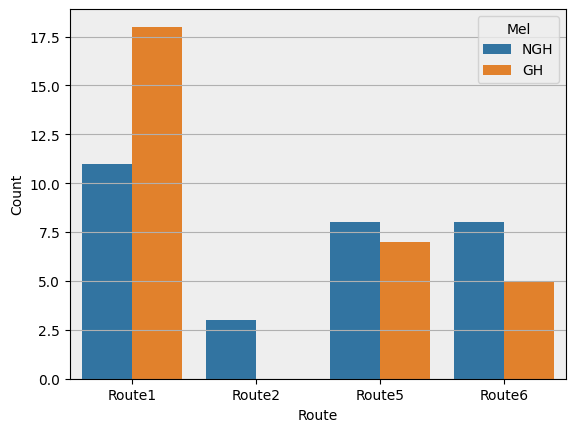

In [61]:
ax = sns.barplot(y="Con", x='Route', hue='Mel', data=df_route1, errorbar=('ci', 0))
# ax.set_ylim(0, 1)
ax.set_ylabel('Count')
# plt.savefig('Routes.png', dpi=300)
plt.show()

In [62]:
# route_set = list(set(list(GH_route.keys()) + list(NGH_route.keys())))
df_route3 = pd.DataFrame(columns=['Route', 'Mel', 'Con'])
i = 0
for j in range(df_route_count.shape[0]):
    if df_route_count.iloc[j]['Route'] in route_set2:
        r = df_route_count.iloc[j]['Route']

        df_route3.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route3.loc[i, 'Mel'] = 'NGH in Case 1'
        df_route3.loc[i, 'Con'] = NGH_route[r] if r in NGH_route.keys() else 0
        i += 1
        
        df_route3.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route3.loc[i, 'Mel'] = 'GH in Case 1'
        df_route3.loc[i, 'Con'] = GH_route[r] if r in GH_route.keys() else 0
        i += 1

        df_route3.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route3.loc[i, 'Mel'] = 'NGH in Case 2'
        df_route3.loc[i, 'Con'] = NGH_route2[r] if r in NGH_route2.keys() else 0
        i += 1

        df_route3.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route3.loc[i, 'Mel'] = 'GH in Case 2'
        df_route3.loc[i, 'Con'] = GH_route2[r] if r in GH_route2.keys() else 0
        i += 1

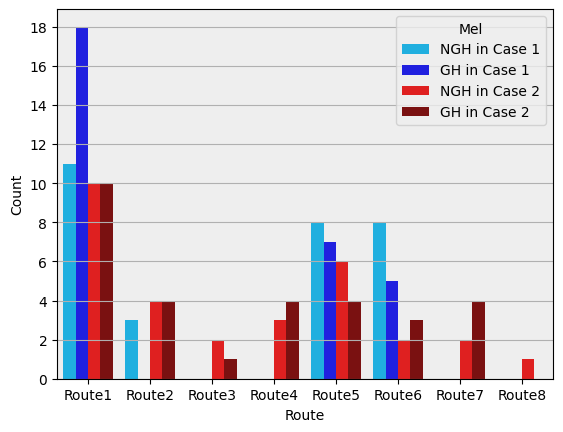

In [63]:
ax = sns.barplot(y="Con", x='Route', hue='Mel', data=df_route3, palette=['deepskyblue', 'blue', 'red', 'darkred'])
ax.set_yticks(range(0, 20, 2))
ax.set_yticklabels(range(0, 20, 2), rotation=0)
ax.set_ylabel('Count')
plt.savefig('Routes_total.png', dpi=300)
plt.show()

In [64]:
# route_set = list(set(list(GH_route.keys()) + list(NGH_route.keys())))
df_route2 = pd.DataFrame(columns=['Route', 'Mel', 'Con'])
i = 0
for j in range(df_route_count.shape[0]):
    if df_route_count.iloc[j]['Route'] in route_set2:
        r = df_route_count.iloc[j]['Route']

        df_route2.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route2.loc[i, 'Mel'] = 'NGH'
        df_route2.loc[i, 'Con'] = NGH_route2[r] if r in NGH_route2.keys() else 0
        i += 1

        df_route2.loc[i, 'Route'] = df_route_count.iloc[j]['Name']
        df_route2.loc[i, 'Mel'] = 'GH'
        df_route2.loc[i, 'Con'] = GH_route2[r] if r in GH_route2.keys() else 0
        i += 1

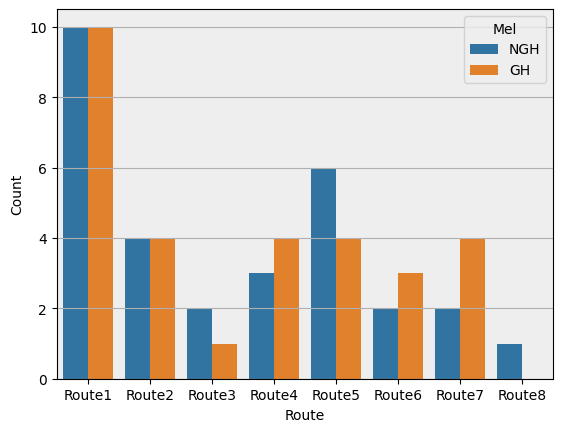

In [65]:
ax = sns.barplot(y="Con", x='Route', hue='Mel', data=df_route2, errorbar=('ci', 0))
# ax.set_ylim(0, 1)
ax.set_ylabel('Count')
# plt.savefig('Routes.png', dpi=300)
plt.show()